[0.01422545 0.02834971 0.04237321]
[0.001 0.002 0.003]
[14.22545385 14.17485351 14.12440349]
f_ord : 14.07387831433407


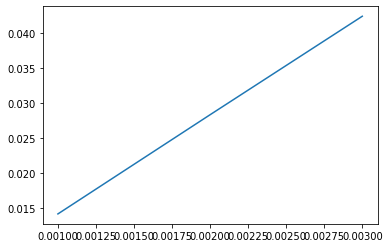

In [1]:
###########################################initial young's modulus of spider silk##############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

f_ord10 = 1#ordered fraction
vw = 40 #van der waal's volume cc/mol
v0 = 1.26*vw #volume at the minimm potential well
Ec = f_ord10*52000 + (1-f_ord10)*42000 #cohensive energy fraction of ordered = 0.66
E0 = Ec/(4.5*10**23)#potential energy at absolute temperature
N = 10 #degree of freedom
dt = 400 #debye temperature
M = 72 #molecular weight
k = 1.380649*10**-23 #boltzmann constant J/k
A = 1.5 #parameter A about 1.5kGpa
R =8.314 

E_f = []
b_f = []
v_f = []
T = []
H_f = []
E_M_f = []
e_f = []
ee_f = []
strain_f0 = []
stress_f0 = []

from scipy.integrate import quad

def f1(t, N, dt, Ec):#stress
    Ht = (N/3)*k*(t - (dt/6.7)*(math.atan((6.7*t)/dt)))
    v = 1.26*vw*((1-((0.106*(1-f_ord10)+0.04*f_ord10)+(Ht/E0))**0.5)**(-1/3))
    #total energy
    r = v0/v
    E_t = abs(E0*((r**6)-2*(r**3))*4.5*10**23)#calculate energy total
    #bulk modulus
    b = (18*E_t)/(v*1000)
    x = (1-f_ord10)*(19)/(A*b) #19 no need to*0.5 due hydrocarbon_all is 19
    ten = b*math.exp(-x)*0.0001
    return (ten)

for i in range(3):
    strain = 0.0001*(i+1)*10
    stress_t = quad(f1, 0+273, 0+(i+1)*10+273, args=(N, dt, Ec))[0]
    strain_f0 = np.append(strain_f0,strain)
    stress_f0 = np.append(stress_f0,stress_t)
    
print(stress_f0)  
print(strain_f0)
print(stress_f0/strain_f0)

strain_f0 = np.array(strain_f0)
stress_f0 = np.array(stress_f0)


plt.plot(strain_f0,stress_f0)

slope1, intercept = np.polyfit(strain_f0,stress_f0, 1)
print('f_ord :',slope1)
    


[0.001 0.002 0.003]
[0.01072837 0.02135419 0.03187795]
[10.72836901 10.67709701 10.625984  ]
f_ord : 10.574791498438119


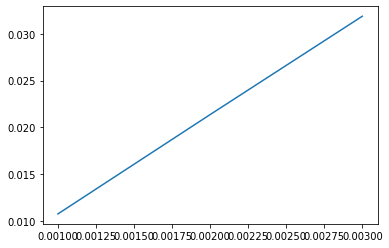

In [4]:
##################################post-yield modulus of spider silk#############################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

f_ord10 = 1#ordered fraction
vw = 40 #van der waal's volume cc/mol
v0 = 1.26*vw #volume at the minimm potential well
Ec = f_ord10*52000 + (1-f_ord10)*42000 #cohensive energy fraction of ordered = 0.66
E0 = Ec/(4.5*10**23)#potential energy at absolute temperature
N = 12 #degree of freedom
dt = 400 #debye temperature
M = 72 #molecular weight
k = 1.380649*10**-23 #boltzmann constant J/k
A = 1.5 #parameter A about 1.5kGpa
R =8.314 

E_f = []
b_f = []
v_f = []
T = []
H_f = []
E_M_f = []
e_f = []
ee_f = []
strain_f0 = []
stress_f0 = []

from scipy.integrate import quad

def f1(t, N, dt, Ec):#stress
    Ht = (N/3)*k*(t - (dt/6.7)*(math.atan((6.7*t)/dt)))
    v = 1.26*vw*((1-((0.106*(1-f_ord10)+0.04*f_ord10)+(Ht/E0))**0.5)**(-1/3))
    #total energy
    r = v0/v
    E_t = abs(E0*((r**6)-2*(r**3))*4.5*10**23)#calculate energy total
    #bulk modulus
    b = (18*E_t)/(v*1000)
    x = (1-f_ord10)*(45/(A*b)) #(0.0085*cn/Nn)*0.5 = 45 not 44 
    ten = b*math.exp(-x)*0.0001
    return (ten)   

for i in range(3):
    strain = 0.0001*(i+1)*10
    stress_t = quad(f1, 280+273,280+(i+1)*10+273, args=(N, dt, Ec))[0]
    strain_f0 = np.append(strain_f0,strain)
    stress_f0 = np.append(stress_f0,stress_t)

    
strain_f0 = np.array(strain_f0)
stress_f0 = np.array(stress_f0)
print(strain_f0)
print(stress_f0)
print(stress_f0/strain_f0)

plt.plot(strain_f0,stress_f0)

slope1, intercept = np.polyfit(strain_f0,stress_f0, 1)
print('f_ord :',slope1)
    
